In this week, all tests we discussed is Chi-Square distribution-based. So first of all, let's look at this distribution

# $\chi^2$ Distribution

Please feel free to change the degree of freedom, and observe what the distribution looks like

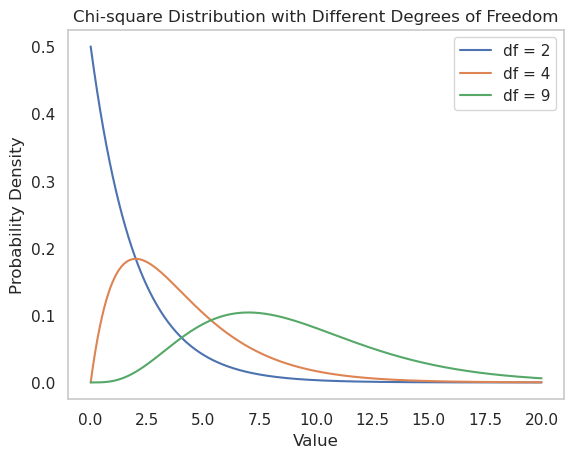

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define the degrees of freedom
dfs = [2, 4, 9]

# Create a range of values (x) from 0 to 20
x = np.linspace(0, 20, 1000)

# Plot the chi-square distribution for each degree of freedom
for df in dfs:
    plt.plot(x, chi2.pdf(x, df), label=f'df = {df}')

plt.title('Chi-square Distribution with Different Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(False)
# plt.savefig('chi-square-distribution.png')
plt.show()

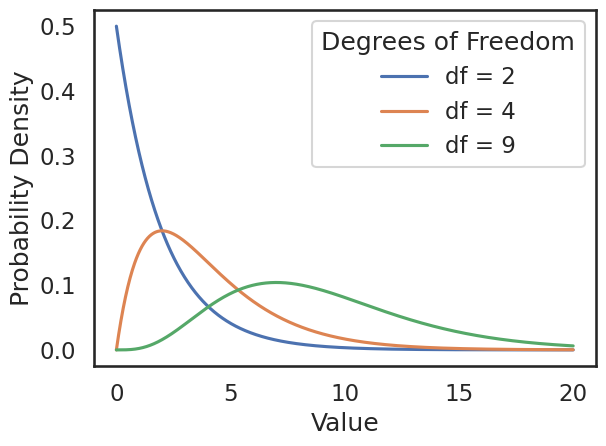

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define the degrees of freedom
dfs = [2, 4, 9]

# Set up the plotting style
sns.set_context('talk')
# sns.set_theme(style="white")

# Create a range of values (x) from 0 to 20
x = np.linspace(0, 20, 1000)

# Plot the chi-square distribution for each degree of freedom
for df in dfs:
    y = chi2.pdf(x, df)
    sns.lineplot(x=x, y=y, label=f'df = {df}')

# plt.title('Chi-square Distribution with Different Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(title='Degrees of Freedom')
plt.tight_layout()
plt.savefig('chi-square-distribution.png')
plt.show()


# Calculate p-value or critical value for $\chi^2$ distribution

In [12]:
from scipy.stats import chi2

# Define the significance level
alpha = 0.05

# Degrees of freedom for the example
df = [2, 4, 9]

# Calculate critical values for each degree of freedom
critical_values = {d: chi2.ppf(1 - alpha, d) for d in df}

# Assuming we have a chi-square test statistic value, for example:
chi_square_statistic = 5.12

# Calculate p-values for each degree of freedom
p_values = {d: chi2.sf(chi_square_statistic, d) for d in df}

print("Critical values for different degrees of freedom:")
for d, cv in critical_values.items():
    print(f"df={d}: {cv:.3f}")

print("\nP-values for chi-square statistic of 5.12:")
for d, pv in p_values.items():
    print(f"df={d}: {pv:.3f}")

Critical values for different degrees of freedom:
df=2: 5.991
df=4: 9.488
df=9: 16.919

P-values for chi-square statistic of 5.12:
df=2: 0.077
df=4: 0.275
df=9: 0.824


# Results showing in the Account Type Example

In [18]:
chi2.ppf(0.95, 2)

5.991464547107979

In [20]:
chi2.isf(0.05, 2)

5.991464547107983

In [15]:
chi2.sf(29.28, 2) 

4.3845879395753135e-07

In [16]:
chi2.cdf(29.28, 2)

0.9999995615412061

# Visualisation for the Example

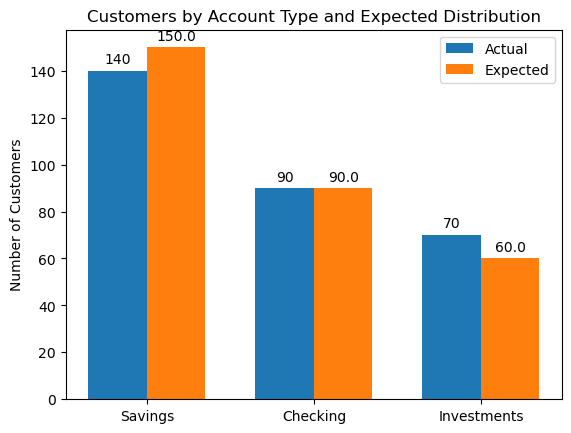

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
account_types = ['Savings', 'Checking', 'Investments']
customers = [140, 90, 70]
expected_distribution = [50, 30, 20]

# Converting expected distribution percentages to actual numbers for comparison
total_customers = sum(customers)
expected_numbers = [total_customers * (percent / 100) for percent in expected_distribution]

# Creating the bar plot
x = np.arange(len(account_types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, customers, width, label='Actual')
rects2 = ax.bar(x + width/2, expected_numbers, width, label='Expected')

# Adding labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Customers')
ax.set_title('Customers by Account Type and Expected Distribution')
ax.set_xticks(x)
ax.set_xticklabels(account_types)
ax.legend()

# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Showing the plot
plt.show()

# Case Study: Young Professional Magzine

Let's try to do the test for association/independence between 2 categorical variables

# Young Professional Magazine

Young Professional magazine was developed for a target audience of recent university graduates who are in their first 10 years in a business/professional career. In its two years of publication, the magazine has been fairly successful. Now the publisher is interested in expanding the magazine's advertising base. Potential advertisers continually ask about the demographics and interests of subscribers to _Young Professional_. To collect this information, the magazine commissioned a survey to develop a profile of its subscribers. The survey results will be used to help the magazine choose articles of interest and provide advertisers with a profile of subscribers. As a new employee of the magazine, you have been asked to help analyze the survey results.

Some of the survey questions follow (these are not necessarily in the order they were asked in the survey):

1. What is your age?
2. Are you: Male ___ Female ___
3. Do you plan to make any real estate purchases in the next two years? Yes ___ No ____
4. What is the approximate total value of financial investments, exclusive of your home, owned by you or members of your household?
5. How many stock/bond/mutual fund transactions have you made in the past year?
6. Do you have broadband access to the Internet at home? Yes ___ No ___
7. Please indicate your total household income last year.
8. Do you have children? Yes ___ No ___

**Although the files contain a sample of subscribers, in this lab we will treat it as a population for the sake of illustration.**

In [2]:
import pandas as pd

In [3]:
df_professional = pd.read_excel('Professional.xls')

In [4]:
df_professional

,Age,Gender,Real Estate Purchases?,Value of Investments ($),Number of Transactions,Broadband Access?,Household Income ($),Have Children?
0,28,Female,Yes,19600,6,No,95300,No
1,31,Female,Yes,15100,5,No,73300,Yes
2,33,Female,No,33800,3,No,48600,No
3,35,Female,Yes,15500,6,No,43500,No
4,30,Female,No,28200,3,No,61900,Yes
...,...,...,...,...,...,...,...,...
405,32,Female,Yes,23900,2,Yes,42200,No
406,32,Female,No,27400,7,Yes,83500,No
407,26,Female,Yes,14400,3,Yes,28200,Yes
408,24,Male,Yes,36000,4,Yes,103500,No


## Chi-Squared Test of Independence

We work with ‘Young Professional Magazine’ case study and `Professional.xls` datasets. 

We’ll be testing if Real Estate Purchase is independent of Gender.
This can be done by chi-squared test of independence.

-	H0 :  Real Estate Purchase and Gender are Independent  (Independent)
-	H1 :  Real Estate Purchase and Gender are Dependent    (Associated)

### Step 1: Cross-Table

In [6]:
# Now that we have the correct column names, let's create the cross-tabulation
crosstab = pd.crosstab(df_professional['Gender'], df_professional['Real Estate Purchases?'])

crosstab

Real Estate Purchases?,No,Yes
Gender,,
Female,97,84
Male,132,97


In [9]:
from scipy.stats import chi2_contingency

### Step 2: Calculate the chi-square statistic and p-value

In [10]:
chi2_statistic, p_value, degrees_of_freedom, expected_counts = chi2_contingency(crosstab)

### Step 3: Determine the critical value for the chi-square statistic at a 95% confidence level

In [11]:
from scipy.stats import chi2
confidence_level = 0.95
critical_value = chi2.ppf(confidence_level, degrees_of_freedom)

### Step 4: Compare the chi-square statistic to the critical value to determine if the result is significant

In [12]:
is_significant = chi2_statistic > critical_value

In [13]:
# Display the results
chi2_results = {
    'Chi-Square Statistic': chi2_statistic,
    'Degrees of Freedom': degrees_of_freedom,
    'P-Value': p_value,
    'Critical Value (95%)': critical_value,
    'Is Significant at 95%': is_significant
}

chi2_results

{'Chi-Square Statistic': 0.5185023264469725,
 'Degrees of Freedom': 1,
 'P-Value': 0.47148124699524996,
 'Critical Value (95%)': 3.841458820694124,
 'Is Significant at 95%': False}

In [15]:
# Create a DataFrame for a better-looking table of the results
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['Value'])

# Adjust the display format for the p-value and chi-square statistic
chi2_results_df.loc['Chi-Square Statistic', 'Value'] = f"{chi2_results['Chi-Square Statistic']:.4f}"
chi2_results_df.loc['P-Value', 'Value'] = f"{chi2_results['P-Value']:.4f}"
chi2_results_df.loc['Critical Value (95%)', 'Value'] = f"{chi2_results['Critical Value (95%)']:.4f}"
chi2_results_df.loc['Is Significant at 95%', 'Value'] = "No" if chi2_results['Is Significant at 95%'] is False else "Yes"

# Display the table
chi2_results_df

,Value
Chi-Square Statistic,0.5185
Degrees of Freedom,1
P-Value,0.4715
Critical Value (95%),3.8415
Is Significant at 95%,Yes


In [16]:
# Conclusion
conclusion = "The chi-square test result is not significant at the 95% confidence level, suggesting that there is no statistical evidence of an association between gender and the likelihood of making real estate purchases in this sample."
conclusion

'The chi-square test result is not significant at the 95% confidence level, suggesting that there is no statistical evidence of an association between gender and the likelihood of making real estate purchases in this sample.'

## Open Question: Can you use other columns to run other test questions?